## UTAH FORGE PROJECT'S MISSION

Enable cutting-edge research and drilling and technology testing, as well as to allow scientists to identify a replicable, commercial pathway to EGS. In addition to the site itself, the FORGE effort will include a robust instrumentation, data collection, and data dissemination component to capture and share data and activities occurring at FORGE in real time. The innovative research, coupled with an equally-innovative collaboration and management platform, is truly a first of its kind endeavor. More details here https://utahforge.com/

#### The data used in this repository comes from the public data provided by Utah FORGE https://gdr.openei.org/submissions/1111

##### Some functions adapted from https://sainosmichelle.github.io/elements.html

#### Diana Acero Allard (https://github.com/dianaceroallard) and Maria Cecilia Bravo (https://github.com/mariabravosegnini) are the main authors of this notebook and it is adapted for a python demonstration in Transform21 - Software Undergound. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read 58-32 well logs in feet

In [4]:
main = lasio.read('../alldata/58-32_main.las')


### Using Pandas to crete a DataFrame
the DataFrames are two-dimensional tables with row and columns that can be easily edited and manipulated. i.e change size, call elements from within the table, perform operations, among other usages.


In [5]:
#Create DataFrame line command from what it was read with Lasio
df_data = main.df()

#Printing the first 5 rows of the data frame with the header of the columns (if any) 
df_data.head(5)

,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,AO90,...,SPAR,STIT,TENS,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90
DEPT,,,,,,,,,,,,,,,,,,,,,
10.5,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
11.0,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
11.5,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
12.0,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
12.5,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664


### Other operations within the DataFrame 

In [6]:
#Delete columns - as many or as few as you need
df_data_small = df_data.drop(['AF10', 'AF20','AF30','AF60','AF90','AO20','AO30','AO60','AO90','SPAR',
                              'AT10','AT20','AT30','AT60','AO10','AORT','AORX','CDF','CFTC','CNTC','CTEM',
                              'DNPH','DPHZ','DSOZ','ECGR','ED','GDEV','DCAL','GR_EDTC','GTEM','HCAL',
                              'HDRA','HDRB','HGR','HMIN','HMNO','HNPO','HPRA','HTNP','ND','NPHI','NPOR',
                              'PEFZ','PXND_HILT','RHOZ','RSOZ','RWA_HILT','RXO8','RXOZ',
                              'STIT','TENS','TNPH','HTNP_SAN','ATCO10','ATCO20','ATCO30','ATCO60',
                              'ATCO90'],axis=1)
df_data_small.head(5)

,AT90,GR,SP
DEPT,,,
10.5,19.7369,160.0384,NaN
11.0,19.7369,160.0384,NaN
11.5,19.7369,160.0384,NaN
12.0,19.7369,160.0384,NaN
12.5,19.7369,160.0384,NaN


In [40]:
#Replace values in a column??????
df_replaced= df_data_small.replace(160.0384,'NaN')
df_replaced.head()

,AT90,GR,SP
DEPT,,,
10.5,19.7369,NaN,NaN
11.0,19.7369,NaN,NaN
11.5,19.7369,NaN,NaN
12.0,19.7369,NaN,NaN
12.5,19.7369,NaN,NaN


In [39]:
#calling 1 column using index label to make a closer inspection
df_replaced['GR']

DEPT
10.5          NaN
11.0          NaN
11.5          NaN
12.0          NaN
12.5          NaN
           ...   
7572.0    185.217
7572.5    185.217
7573.0    185.217
7573.5    185.217
7574.0    185.217
Name: GR, Length: 15128, dtype: object

In [26]:
#change order of columns using pandas
df_data_columns=df_data_small[['SP','AT90','GR']]
df_data_columns

,SP,AT90,GR
DEPT,,,
10.5,NaN,19.7369,160.0384
11.0,NaN,19.7369,160.0384
11.5,NaN,19.7369,160.0384
12.0,NaN,19.7369,160.0384
12.5,NaN,19.7369,160.0384
...,...,...,...
7572.0,64.2308,1950.0000,185.2172
7572.5,65.9375,1950.0000,185.2172
7573.0,64.9519,1950.0000,185.2172


In [27]:
#change name of Columns
df_data_name=df_data_small.rename(columns={'SP':'Curve1','AT90':'Curve2'})
df_data_name

,Curve2,GR,Curve1
DEPT,,,
10.5,19.7369,160.0384,NaN
11.0,19.7369,160.0384,NaN
11.5,19.7369,160.0384,NaN
12.0,19.7369,160.0384,NaN
12.5,19.7369,160.0384,NaN
...,...,...,...
7572.0,1950.0000,185.2172,64.2308
7572.5,1950.0000,185.2172,65.9375
7573.0,1950.0000,185.2172,64.9519


In [28]:
#lets look at the index, on this data frame we are using the first column "DEPT"
print(df_data.index)

Float64Index([  10.5,   11.0,   11.5,   12.0,   12.5,   13.0,   13.5,   14.0,
                14.5,   15.0,
              ...
              7569.5, 7570.0, 7570.5, 7571.0, 7571.5, 7572.0, 7572.5, 7573.0,
              7573.5, 7574.0],
             dtype='float64', name='DEPT', length=15128)


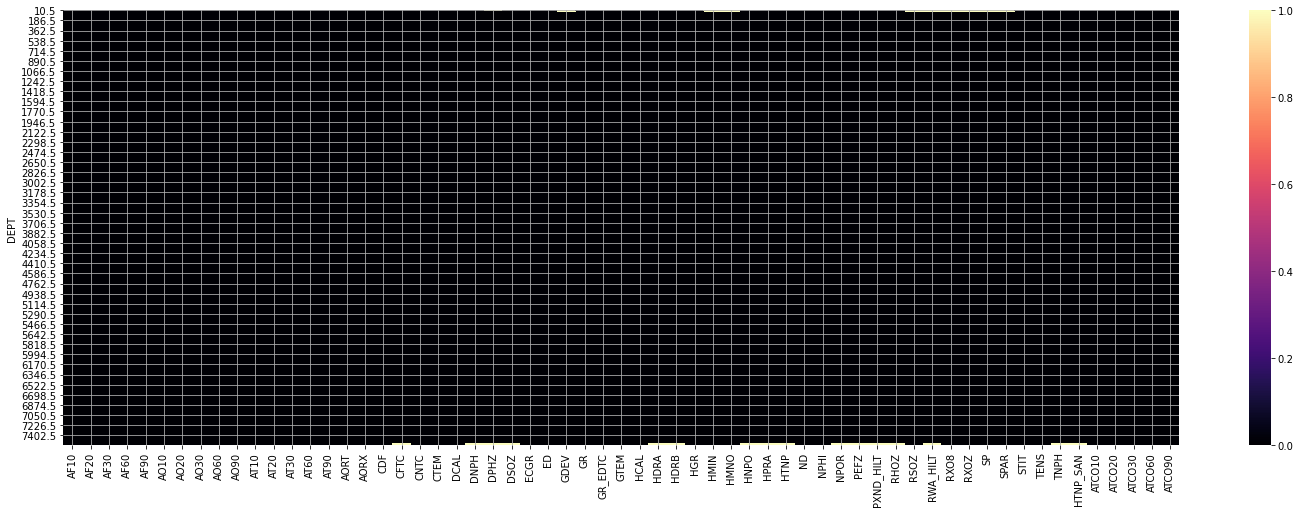

In [29]:
#to visually see how complete is the data and see if there are parameters with 
#missing data we can use this method

fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df_data.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

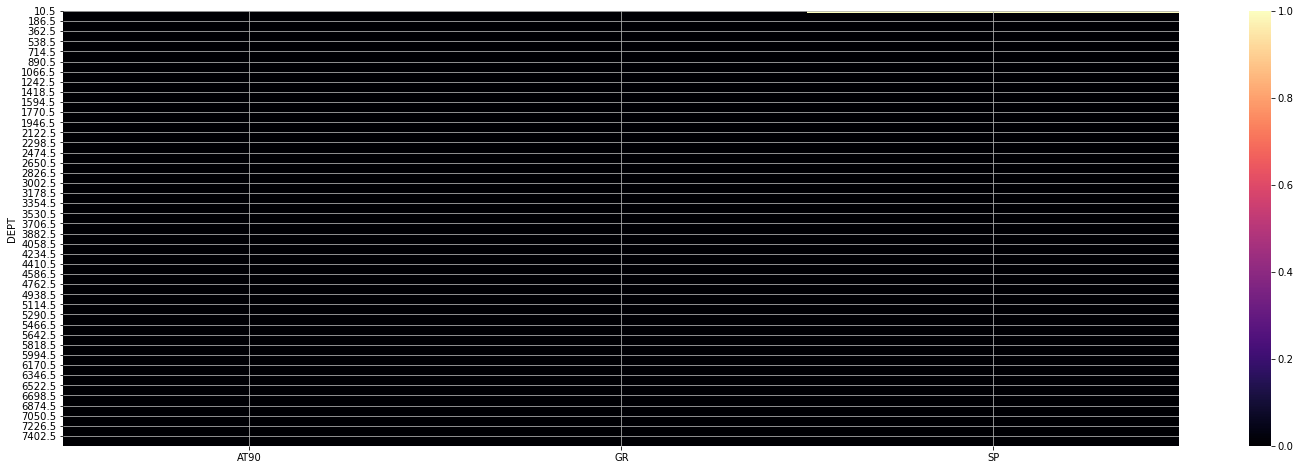

In [30]:
#to visually see how complete is the data and see if there are parameters with 
#missing data we can use this method
#what about the small df where we have replaced some values?

fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df_replaced.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

### Calculate Volume of shale (Vsh) from GR formula Vsh=(GR-GRmin)/(GRmax-GRmin)

In [10]:
#Make operations with selected columns

dfmain['Vsh'] = dfmain['GR'] - min(dfmain['GR'])/(max(dfmain['GR'])- min(dfmain['GR']))
dfmain['Vsh'].describe()

count    15128.000000
mean       142.736902
std         69.231103
min         17.582554
25%         85.715304
50%        149.679004
75%        179.374504
max        641.061454
Name: Vsh, dtype: float64

### Read Thermal conductivity and mineralogy data measured in drill cuttings. CAUTION: Depths are in meters, need to be converted to feet
##### Full report https://ugspub.nr.utah.gov/publications/misc_pubs/mp-169/mp-169-l.pdf

In [12]:
#We can use Pandas to read a .csv file Thermal Conductivity lab data

TC_coredata = pd.read_csv ('../alldata/58-32_thermal_conductivity_data.csv') 

#we can use the operations to make units conversions and 
#substitute the columns with the new converted units.
#for example changing from ft to meters in the core data.

TC_coredata['Depth'] = (3.28084*TC_coredata['Lower Depth Interval (m)'])
TC_coredata['Matrix_TC']=TC_coredata['matrix thermal conductivity (W/m deg C)']
TC_coredata.set_index('Depth', inplace=True)

#XRD mineralogy lab data
XRD_coredata = pd.read_csv ('../alldata/58-32_xray_diffraction_data.csv') 
XRD_coredata = XRD_coredata.replace('tr',0)
XRD_coredata['Depth'] = (3.28084*XRD_coredata['Lower Depth Range (m)'])
XRD_coredata.set_index('Depth', inplace=True)

TC_coredata.tail(8)

,Lower Depth Interval (m),Upper Depth Interval (m),matrix thermal conductivity (W/m deg C),Matrix_TC
Depth,,,,
6699.803364,2042.1,2045.1,3.03,3.03
6899.606520,2103.0,2106.1,3.13,3.13
6999.672140,2133.5,2136.5,3.46,3.46
7099.737760,2164.0,2167.0,2.80,2.80
7199.803380,2194.5,2197.5,2.96,2.96
7299.540916,2224.9,2228.0,3.16,3.16
7399.606536,2255.4,2258.5,2.68,2.68
7499.672156,2285.9,2288.9,2.78,2.78


### Create a function that would create a layout with basic logs and core data

In [31]:
#basic plot to inspect data 
def make_layout_tc (log_df, XRD, TC):
  
    fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, squeeze=True, figsize=(15, 15), gridspec_kw={'wspace': 0.25})
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.975, top=0.7, wspace=0.2, hspace=0.2)
    axs[0].set_ylabel('Depth (ft)')
    axs[0].invert_yaxis()
    axs[0].get_xaxis().set_visible(False)
    
    # First track GR/SP logs to display
    ax1 = axs[0].twiny()  
    ax1.plot(log_df.GR, log_df.index, '-', color='#2ea869', linewidth=0.5)
    ax1.set_xlim(0,450) 
    ax1.set_xlabel('GR (API)', color='#2ea869')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.075)) 
    
    ax2 = axs[0].twiny() 
    ax2.plot(log_df.SP, log_df.index, '-', color='#0a0a0a', linewidth=0.7)
    ax2.set_xlim(-200,200) 
    ax2.set_xlabel('SP(mV)', color='#0a0a0a')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.0))    
    ax2.grid(True)
    axs[0].get_xaxis().set_visible(False)
    
    # Second track RHOZ/NPHI logs to display
    ax1 = axs[1].twiny()  
    ax1.plot(log_df.RHOZ, log_df.index, '-', color='#ea0606', linewidth=0.5)
    ax1.set_xlim(1.5,3.0) 
    ax1.set_xlabel('RHOZ (g/cm3)', color='#ea0606')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.075))

    ax2 = axs[1].twiny()  
    ax2.plot(log_df.NPHI, log_df.index, '-', color='#1577e0', linewidth=0.5)
    ax2.set_xlim(1,0) 
    ax2.set_xlabel('NPHI (v/v)', color='#1577e0')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.0))
    ax2.grid(True)
    axs[1].get_xaxis().set_visible(False)
    
    # Third track Resistivities
    ax1 = axs[2].twiny()  
    ax1.plot(log_df.AT10, log_df.index, '-', color='#6e787c', linewidth=0.5)
    ax1.set_xlim(0.1,100000)  
    ax1.set_xlabel('AT10 (ohm.m)', color='#6e787c')
    ax1.set_xscale('log')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.075))
    
    ax2 = axs[2].twiny()  
    ax2.plot(log_df.AT90, log_df.index, '-', color='#ea0606', linewidth=0.5)
    ax2.set_xlim(0.1,100000)  
    ax2.set_xlabel('AT90 (ohm.m)', color='#ea0606')
    ax2.set_xscale('log')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.0))
    ax2.grid(True)
    axs[2].get_xaxis().set_visible(False)


  # Fourth track XRD to display
    ax1 = axs[3].twiny()  
    ax1.plot(XRD.Quartz, XRD.index, 'o', color='#eac406')
    ax1.set_xlim(0,50) 
    ax1.set_xlabel('Quartz %', color='#eac406')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.075))
    
    ax2 = axs[3].twiny()  
    ax2.plot(XRD['Illite'], XRD.index, 'o', color='#94898c')
    ax2.set_xlim(0,50) 
    ax2.set_xlabel('Illite %', color='#94898c')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.0))
    ax2.grid(True)
    axs[3].get_xaxis().set_visible(False)


    # Fifth track Temp/TC to display
    ax1 = axs[4].twiny()  
    ax1.plot(TC.Matrix_TC, TC.index, 'o', color='#6e787c')
    ax1.set_xlim(0,5) 
    ax1.set_xlabel('Matrix TC Measured W/mC', color='#6e787c')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.075))

    ax2 = axs[4].twiny()  
    ax2.plot(log_df.CTEM, log_df.index, '-', color='#ed8712')
    ax2.set_xlim(0,300) 
    ax2.set_xlabel('Temp degF', color='#ed8712')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.0))
    ax2.grid(True)
    axs[4].get_xaxis().set_visible(False)
         
    fig.suptitle('Well Data for UTAH FORGE 58-32',weight='bold', fontsize=20, y=0.85);
    plt.show()


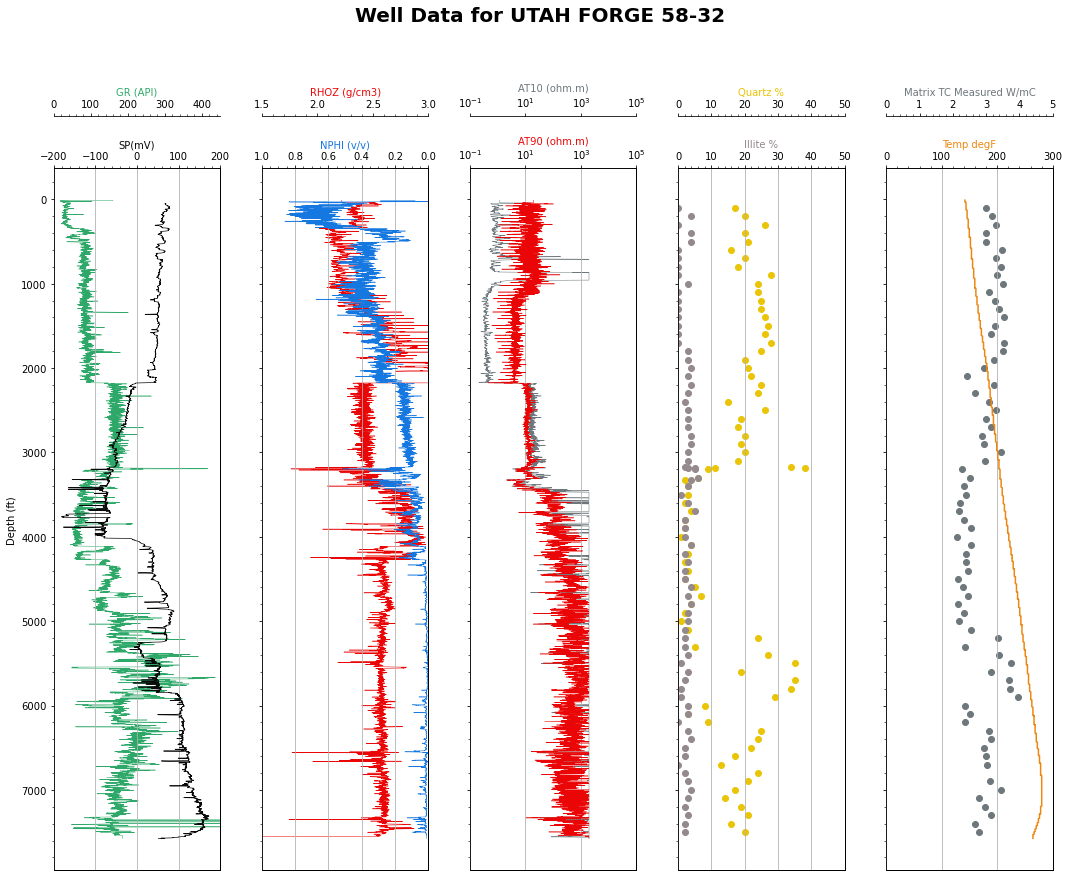

In [32]:
make_layout_tc (dfmain, XRD_coredata, TC_coredata)

### Using Seaborn we will visualized the distribution and some statistict of basic logs 

In [44]:
#below we are building a data frame with selected columns from the file we have read
X=df_data[['GR','RHOZ','NPHI','AT90']]

In [53]:
X[X<0]=0

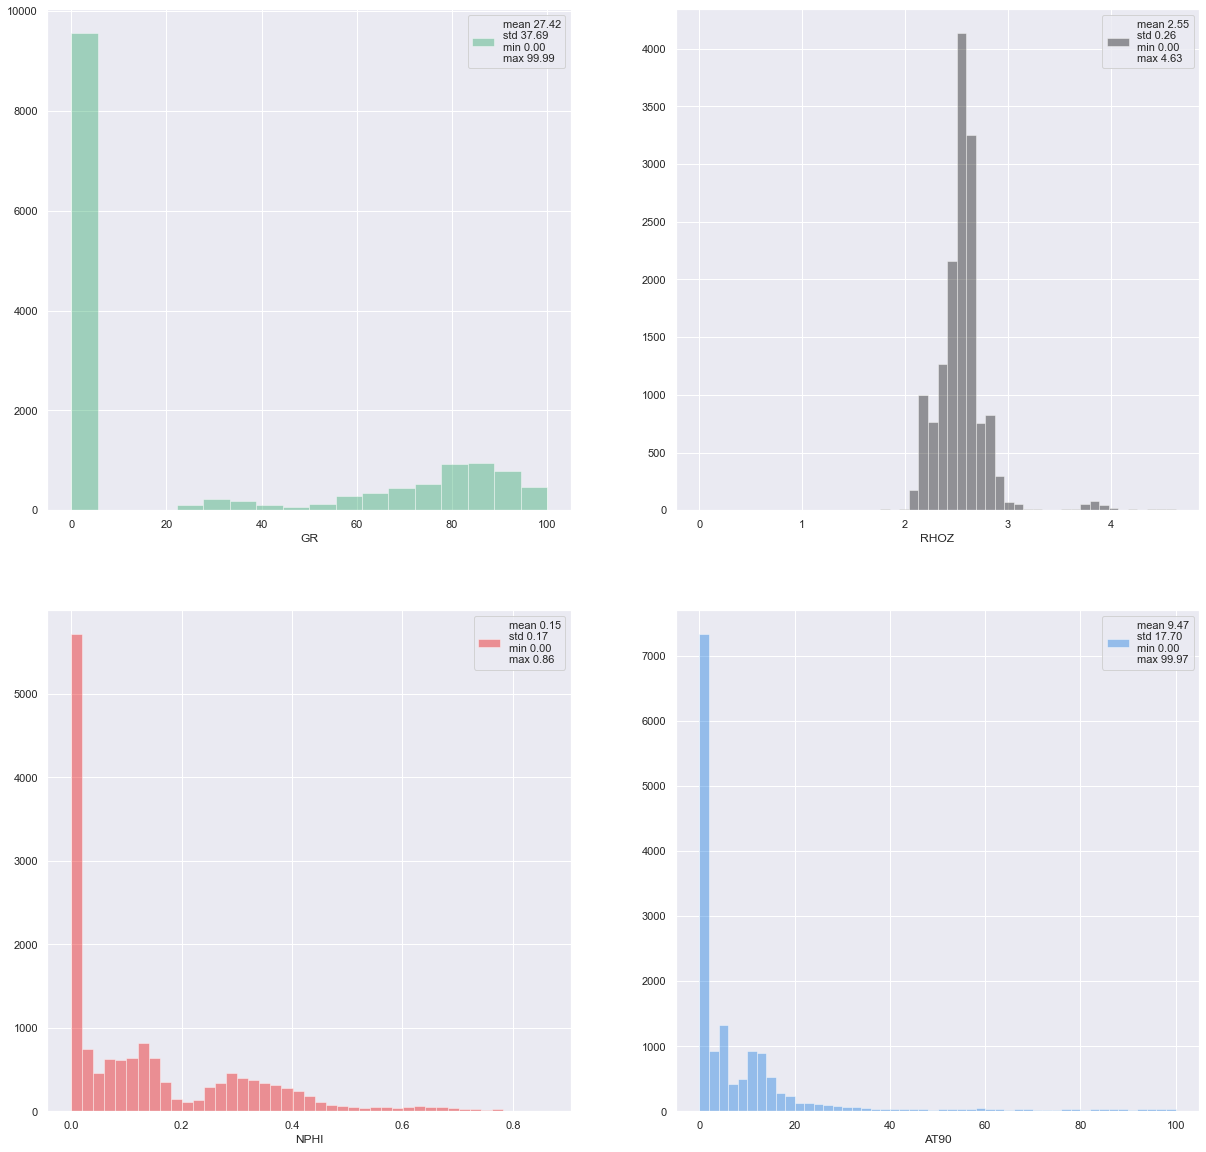

In [54]:
#plottign the statistic using Seaborn
color = ['#2ea869', '#0a0a0a', '#ea0606','#1577e0', '#6e787c','#ea0606', 
         '#ed8712']
sns.set(font_scale=1)
cols = X.columns
n_row = len(cols)
n_col = 2
n_sub = 1
fig = plt.figure(figsize=(10,20))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(X[cols[i]],norm_hist=False,kde=False, color=color[i],
                 label=['mean '+str('{:.2f}'.format(X.iloc[:,i].mean()))
                        +'\n''std '+str('{:.2f}'.format(X.iloc[:,i].std()))
                        +'\n''min '+str('{:.2f}'.format(X.iloc[:,i].min()))
                        +'\n''max '+str('{:.2f}'.format(X.iloc[:,i].max()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()